# [EDA]了解變數分布狀態:Bar & KDE(density plot)

# [教學目標]

以下程式碼將示範如何繪製各種分布圖, 更直覺地看出單一變數本身的分布情形  
分布圖包含 KDE(Kenel Density Estimation) 曲線, 以及 Bar(區間長條圖), 提供兩種不同感受  
順便熟悉 matplotlib 的幾種繪圖設定

# [範例重點]

各種樣式的長條圖(Bar) (In[4], Out[4])
不同的 KDE 曲線與繪圖設定 (In[5], Out[5]) 以及切換不同 Kernel function 的效果 (In[6], Out[6])

In [1]:
 # 需要套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

#設定data_path
dir_data = '../data/'

In [2]:
#讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print("Path of read in data :%s" % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data :../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

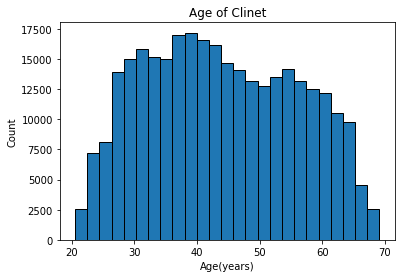

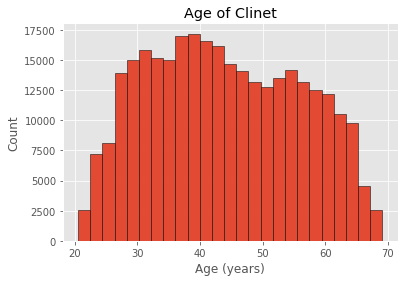

In [4]:
# 以生存年數繪製分布圖
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins =25)
plt.title('Age of Clinet'); plt.xlabel('Age(years)'); plt.ylabel('Count')
plt.show()

# 改變繪圖樣式(style)
plt.style.use('ggplot')

#改變繪圖樣式後再比較結果
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins =25)
plt.title("Age of Clinet"); plt.xlabel('Age (years)'); plt.ylabel('Count')
plt.show()

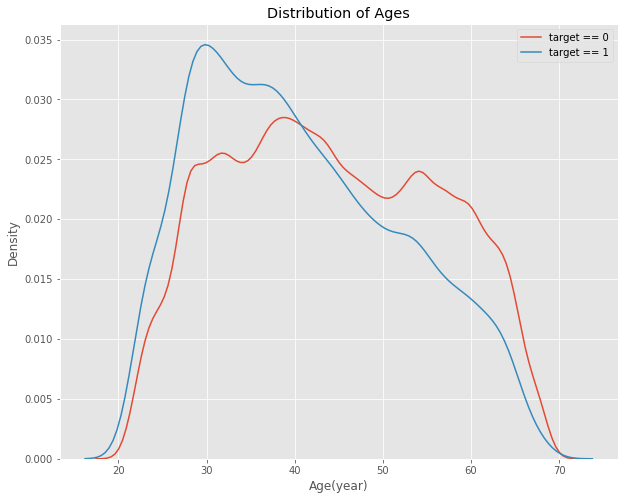

In [5]:
#設定繪圖區域的長與寬
plt.figure(figsize = (10, 8))

#Kenel Density Esimation (KDE) plot:會準時還貸者 - 下圖紅線
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

#KDE plot: 不會只時還貸者 - 下圖藍線
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

#設定標題與X, y軸的說明
plt.xlabel('Age(year)') ; plt.ylabel('Density'); plt.title('Distribution of Ages')

#輸出繪圖 : 有的ipynb環境, 會在結束時自動輸出繪圖, 但加上這行保證在不同環境都畫出圖形
plt.show()

# 補充說明

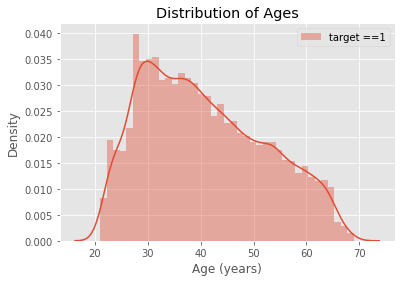

In [6]:
# 完整分布圖 (distplot) : 將 bar 與 Kde 同時呈現
sns.distplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target ==1')
plt.legend()
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')
plt.show()

# It's your turn  

# 除了直接觀察變項以外，我們也可以分群比較

1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)  
2. 以年齡區間為 x, target 為 y 繪製 barplot

In [11]:
#1
#根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] #subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 #day-age to year-age


#自 20 到 70 歲，切 11 個點 (得到 10 組)
bin_cut = 11
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut, include_lowest=True)

# 顯示不同組的數量
age_data['YEARS_BINNED'].value_counts()


(38.192, 42.61]     38108
(33.773, 38.192]    36195
(29.355, 33.773]    35088
(42.61, 47.028]     34019
(51.447, 55.865]    31287
(47.028, 51.447]    29772
(55.865, 60.284]    29229
(24.936, 29.355]    28156
(60.284, 64.702]    24079
(20.468, 24.936]    11860
(64.702, 69.121]     9718
Name: YEARS_BINNED, dtype: int64

In [21]:
#2
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
year_group_sorted = age_data['YEARS_BINNED'].sort_values()
print(len(year_group_sorted))



#plt.figure(figsize=(8,6))
#for i in range(len(year_group_sorted)):
#    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
#                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
#    
#    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
#                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
#plt.title('KDE with Age groups')
#plt.show()

307511


In [14]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.468, 24.936]",0.123862,8518.145363,23.337385
"(24.936, 29.355]",0.110669,10023.364256,27.461272
"(29.355, 33.773]",0.105392,11523.218194,31.570461
"(33.773, 38.192]",0.094129,13161.197375,36.058075
"(38.192, 42.61]",0.081610,14734.235541,40.367769
"(42.61, 47.028]",0.076839,16335.018431,44.753475
"(47.028, 51.447]",0.072350,17956.292960,49.195323
"(51.447, 55.865]",0.063381,19587.859047,53.665367
"(55.865, 60.284]",0.054911,21189.108933,58.052353


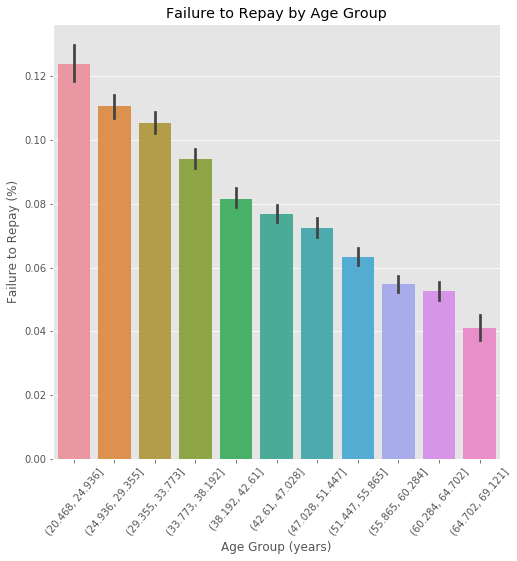

In [19]:
plt.figure(figsize = (8, 8))

# 以年齡區間為X ,target為Y繪製 barplot

px = age_data['YEARS_BINNED']
py = age_data['TARGET']
sns.barplot(px, py)

#Plot labeling
plt.xticks(rotation = 50); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');